In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [2]:
path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Spectrometer/"

fig_folder = path + "Figures/"
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)

actinique_red = pd.read_csv(path + "20240809_speedzen_rouge_actinic_light" + ".csv", delimiter=";", decimal=".")
detecing_blue = pd.read_csv(path + "20240809_speedzen_rouge_detecting_light" + ".csv", delimiter=";", decimal=".")


def normalize_spectra(spectra):
    spectra_baseline = np.mean(spectra["Intensity"][tools.closest_index(spectra["Wavelength"], 300):tools.closest_index(spectra["Wavelength"], 400)])
    spectra["Intensity"] = spectra["Intensity"] - spectra_baseline
    #spectra["Intensity"] = spectra["Intensity"] / np.trapz(spectra["Intensity"], spectra["Wavelength"])
    spectra["Intensity"] = spectra["Intensity"] / np.max(spectra["Intensity"])
    return spectra

actinique_red = normalize_spectra(actinique_red)
detecing_blue = normalize_spectra(detecing_blue)

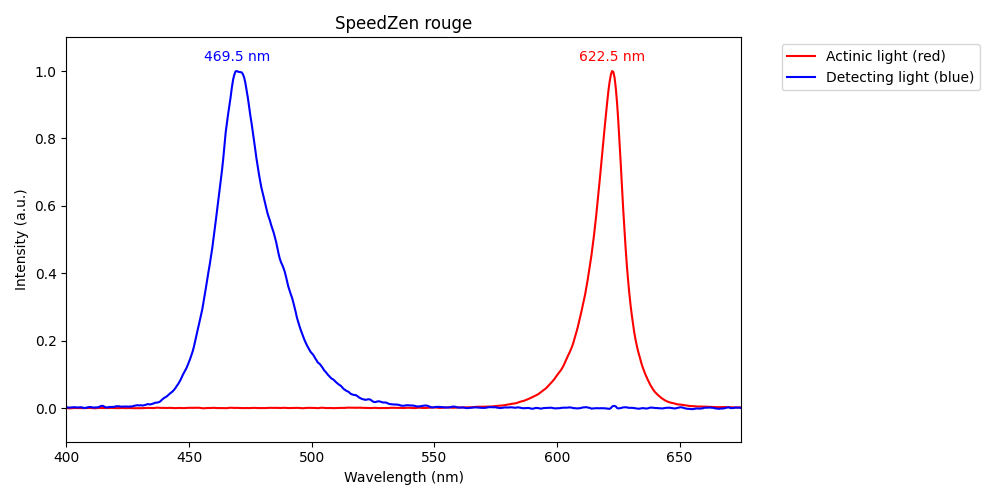

In [3]:
from scipy.signal import find_peaks

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(actinique_red["Wavelength"], actinique_red["Intensity"], label="Actinic light (red)", color="red")
ax.plot(detecing_blue["Wavelength"], detecing_blue["Intensity"], label="Detecting light (blue)", color="blue")

pic_actinic, _ = find_peaks(actinique_red["Intensity"], height=0.5)
pic_detecting, _ = find_peaks(detecing_blue["Intensity"], height=0.5)

ax.text(actinique_red["Wavelength"][pic_actinic[0]], actinique_red["Intensity"][pic_actinic[0]]*1.03, f'{actinique_red["Wavelength"][pic_actinic[0]]} nm', color="red", ha = "center")
ax.text(detecing_blue["Wavelength"][pic_detecting[0]], detecing_blue["Intensity"][pic_detecting[0]]*1.03, f'{detecing_blue["Wavelength"][pic_detecting[0]]} nm', color="blue", ha = "center")

ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Intensity (a.u.)")
ax.set_title("SpeedZen rouge")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlim(400, 675)
ax.set_ylim(-0.1, 1.1)
fig.tight_layout()
fig.savefig(fig_folder + "spectra_speedzen.png", dpi=300)